# Preparing Enviornment

In [40]:
### Installing required packages and importing packages.

%pip install qiskit[visualization]
print("Finished first package")
%pip install qiskit_aer
print("Finished second package")
%pip install qiskit_ibm_runtime
print("Finished third package")

print("Required packages installed.")

Note: you may need to restart the kernel to use updated packages.
Finished first package
Note: you may need to restart the kernel to use updated packages.
Finished second package
Note: you may need to restart the kernel to use updated packages.
Finished third package
Required packages installed.


In [ ]:
# Importing packages.

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram
from qiskit.visualization import plot_circuit_layout
from qiskit.visualization import mathplotlib as mpl

# Preparing Simple Quantum Circuits for Transpilation

## 1. Non-Local CNOT Gate

## 2. Triple Qubit CNOT Gate (Toffoli Gate)

## 3. Bell State Circuit (w/Unsupported Basis Gates)

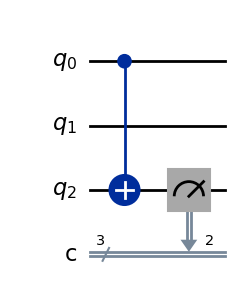

In [42]:
# 1. CNOT on Non-Local Qubits
quantumReg = QuantumRegister(3, 'q')
classicalReg = ClassicalRegister(3, 'c')
nonLocalCNOT = QuantumCircuit(quantumReg, classicalReg)

nonLocalCNOT.cx(quantumReg[0], quantumReg[2])
nonLocalCNOT.measure(quantumReg[2], classicalReg[2])

nonLocalCNOT.draw('mpl')



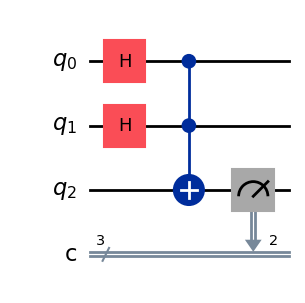

In [43]:
# 2. Triple Qubit CNOT Gate (Toffoli Gate)
quantumReg = QuantumRegister(3, 'q')
classicalReg = ClassicalRegister(3, 'c')
toffoliCircuit = QuantumCircuit(quantumReg, classicalReg)

# 50% chance of control qubit 0 being in |1> state
toffoliCircuit.h(quantumReg[0])
# 50% chance of control qubit 1 being in |1> state
toffoliCircuit.h(quantumReg[1])

# Toffoli Gate Implementation
# 50% * 50% = 25% chance of target qubit being flipped
toffoliCircuit.ccx(quantumReg[0], quantumReg[1], quantumReg[2])
toffoliCircuit.measure(quantumReg[2], classicalReg[2])

toffoliCircuit.draw('mpl')

In [44]:
# 3. Bell State Circuit (w/Basis Gates not native to ibm_torino)
quantumReg = QuantumRegister(2, 'q')
classicalReg = ClassicalRegister(2, 'c')
bellCircuit = QuantumCircuit(quantumReg, classicalReg)

# The H Gate is not a native gate on ibm_torino.
# It creates superposition by transforming the basis states |0⟩ and |1⟩ into equal superpositions.
# Could possibly be recreated with RX and RZ gates which are native to ibm_torino.
bellCircuit.h(0)
# The S Gate is a phase gate that is also not a native gate on ibm_torino.
# It introduces a 90-degree phase shift to the qubit state.
# May not be native, but can easily be recreated with RZ gate of pi/2 which is native to ibm_torino.
bellCircuit.s(0)
# The CX (CNOT) gate is not a native gate on ibm_torino.
# It creates entanglement between two qubits.
# Could possibly be recreated with CZ and H gates, where CZ is native to ibm_torino.
bellCircuit.cx(0, 1)

fig = bellCircuit.draw('mpl')


# Selecting Hardware to run Quantum Circuits (ibm_torino)

The selected backend has a great impact on result of transpilation. This is due to different basis gates and different qubit connectivity layouts which vary with each computer.

By ensuring that we use the same backend each time, ibm_torino, we can ensure that the transpilation of our circuit will be somewhat consistent each time we transpile it. This is because ibm_torino will have the same qubit connectivity and basis gates each time we transpile. 

Qubit and gate coherence times, error rates, and other attributes usually shouldn't change too extremely unless something major is happening to the backend.

In [ ]:
# Selecting hardware backend to run on. The backend we use has great effect on final output of transpilation.

## Save an IBM Quantum account and set it as your default account.
QiskitRuntimeService.save_account(
    token = '',
    set_as_default = True,
    overwrite = True
    )

service = QiskitRuntimeService()

# Selects ibm_torino as the quantum computer to transpile the circuit for.
service = QiskitRuntimeService(channel="ibm_quantum_platform")
backend = service.backend("ibm_torino")
# Basis Gates of ibm_torino: ['cz', 'id', 'rx', 'rz', 'rzz', 'sx', 'x']
print(backend.name)
# This should print out "ibm_torino" as our selected backend.

## Get the target object for our selected backend: ibm_torino.
target = backend.target
# The target object contains all the information about the qubit connectivity (coupling map), and the basis gates available.
# It also contains information about gate error rates, gate duration, and coherence times of specific qubits and gates.

# This puts all the information that the target object for ibm_torino contains in a text file.
file_path = "ibm_torino_target_info.txt"

''' Used to write target info to ibm_torino_target_info.txt file
try: 
    with open(file_path, "w", encoding="utf-8") as file_object:
        file_object.write(str(target))
    print(f"Target information written to '{file_path}'")
except IOError as e:
    print(f"An error occurred while writing to the file: {e}")
'''
''

qiskit_runtime_service.__init__:WARNING:2025-11-17 20:45:35,042: Instance was not set at service instantiation. Free and trial plan instances will be prioritized. Based on the following filters: (tags: None, region: us-east, eu-de), and available plans: (open), the available account instances are: QiskitFallFest2025. If you need a specific instance set it explicitly either by using a saved account with a saved default instance or passing it in directly to QiskitRuntimeService().
qiskit_runtime_service.__init__:WARNING:2025-11-17 20:45:39,410: Instance was not set at service instantiation. Free and trial plan instances will be prioritized. Based on the following filters: (tags: None, region: us-east, eu-de), and available plans: (open), the available account instances are: QiskitFallFest2025. If you need a specific instance set it explicitly either by using a saved account with a saved default instance or passing it in directly to QiskitRuntimeService().
qiskit_runtime_service.backends:

ibm_torino


''

# Target specifications of ibm_torino
### Basis Gates of ibm_torino: ['cz', 'id', 'rx', 'rz', 'rzz', 'sx', 'x']

![CouplingMap of IBM_Torino.png](<attachment:CouplingMap of IBM_Torino.png>) 

### Qubit Connectivity of ibm_torino (CouplingMap)
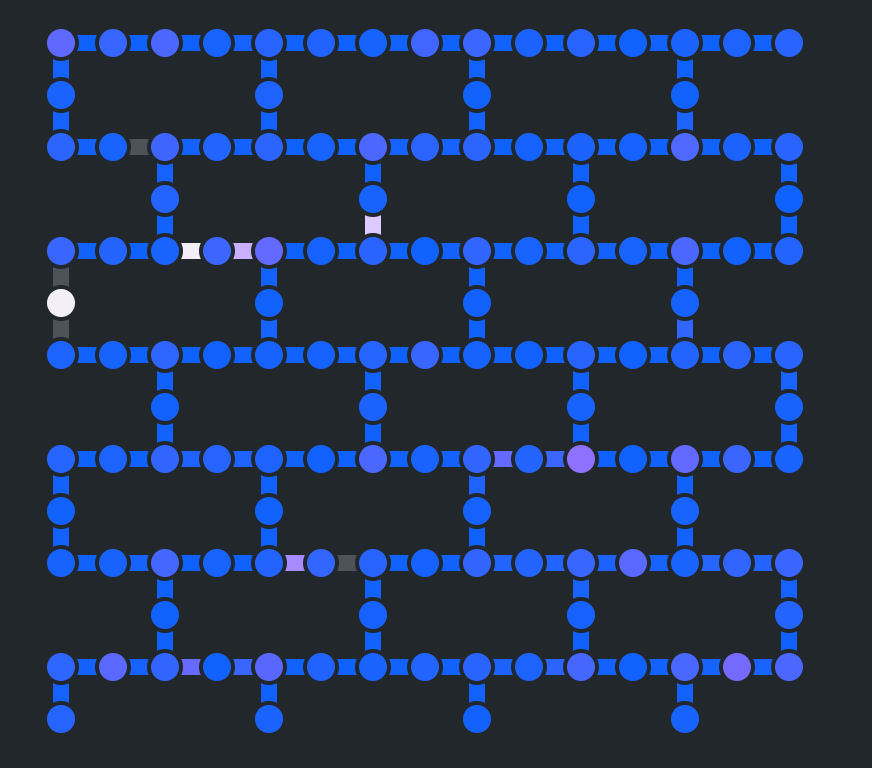

## Transpiling Previously Prepared Quantum Circuits

### 1. Non-Local CNOT Gate
nonLocalCNOT



Original Circuit


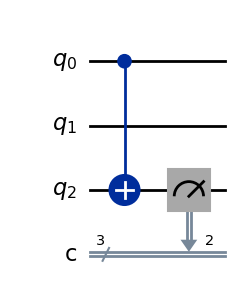

Circuit after lowest optimization level transpilation:


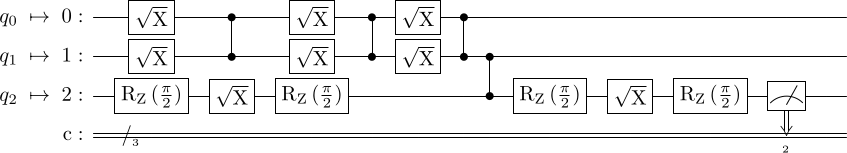

Circuit after optimization level 1 transpilation:
Note circuit has decreased in size and number of gates compared to previous transpilation.


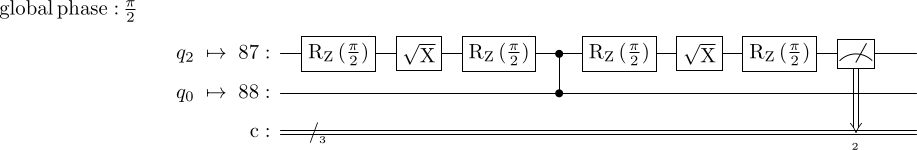

Circuit after optimization level 2 transpilation:


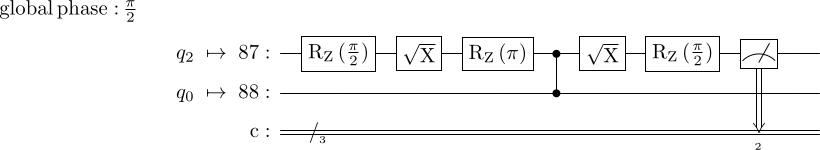

Circuit after optimization level 3 transpilation:
Note no change in the size, number, or parameters of gates compared to previous transpilations.
Note change in qubit number mapping compared to previous transpilations.
This is likely a result of qubit mapping to minimize error rates based on ibm_torino's qubit characteristics and connectivity.


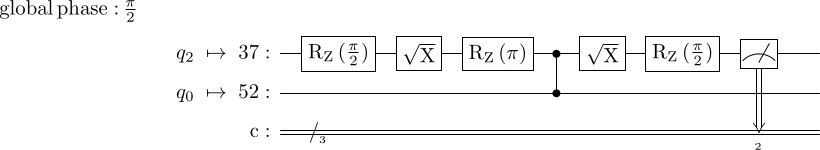

In [ ]:
from IPython.display import display

# Transpiling the circuits for ibm_torino backend using Qiskit's preset pass manager 
# Higher optimization levels should yield more efficient resultant transpiled circuits.
# Higher optimization levels also take longer to transpile, especially for larger circuits.
level0 = generate_preset_pass_manager(target=target, optimization_level=0)
level1 = generate_preset_pass_manager(target=target, optimization_level=1)
level2 = generate_preset_pass_manager(target=target, optimization_level=2)
level3 = generate_preset_pass_manager(target=target, optimization_level=3)

print("Non Local CNOT Circuit")
circuitFigure = nonLocalCNOT.draw(output="mpl")
display(circuitFigure)

# Had to use latex after transpilation because mpl output was throwing an error I could not resolve.
transpiledCircuit = level0.run(nonLocalCNOT)
circuitFigure = transpiledCircuit.draw(output="latex")
print("Circuit after lowest optimization level transpilation:")
display(circuitFigure)

transpiledCircuit = level1.run(nonLocalCNOT)
circuitFigure = transpiledCircuit.draw(output="latex")
print("Circuit after optimization level 1 transpilation:")
print("Note circuit has decreased in size and number of gates compared to previous transpilation.")
display(circuitFigure)

transpiledCircuit = level2.run(nonLocalCNOT)
circuitFigure = transpiledCircuit.draw(output="latex")
print("Circuit after optimization level 2 transpilation:")
print("Note circuit has changed parameter of second RZ gate and reduced number of gates by 1 compared to previous transpilation.")
display(circuitFigure)

transpiledCircuit = level3.run(nonLocalCNOT)
circuitFigure = transpiledCircuit.draw(output="latex")
print("Circuit after optimization level 3 transpilation:")
print("Note no change in the size, number, or parameters of gates compared to previous transpilations.")
print("Note change in qubit number mapping compared to previous transpilation.")
print("This is likely a result of a longer and more rigorous layout stage to minimize error rates based on ibm_torino's qubit characteristics and connectivity.")
display(circuitFigure)


### 2. Triple Qubit CNOT Gate (Toffoli Gate)
toffoliCircuit


Toffoli Circuit


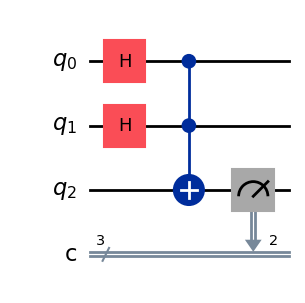

Circuit after lowest optimization level transpilation:


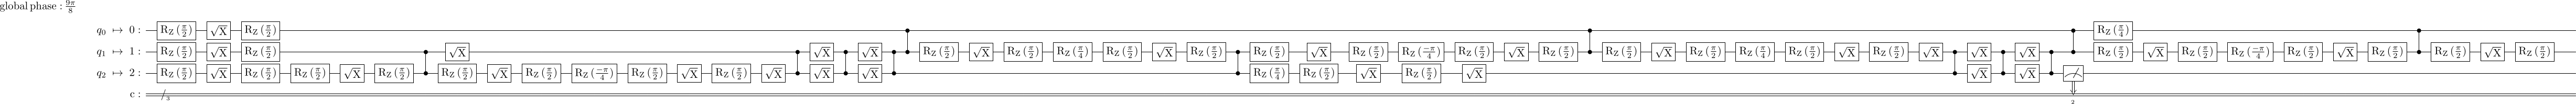

Circuit after optimization level 1 transpilation:


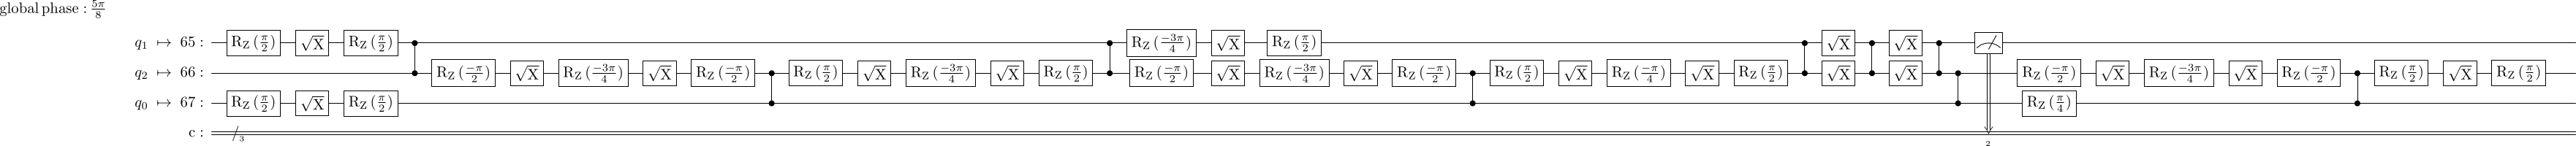

Circuit after optimization level 2 transpilation:


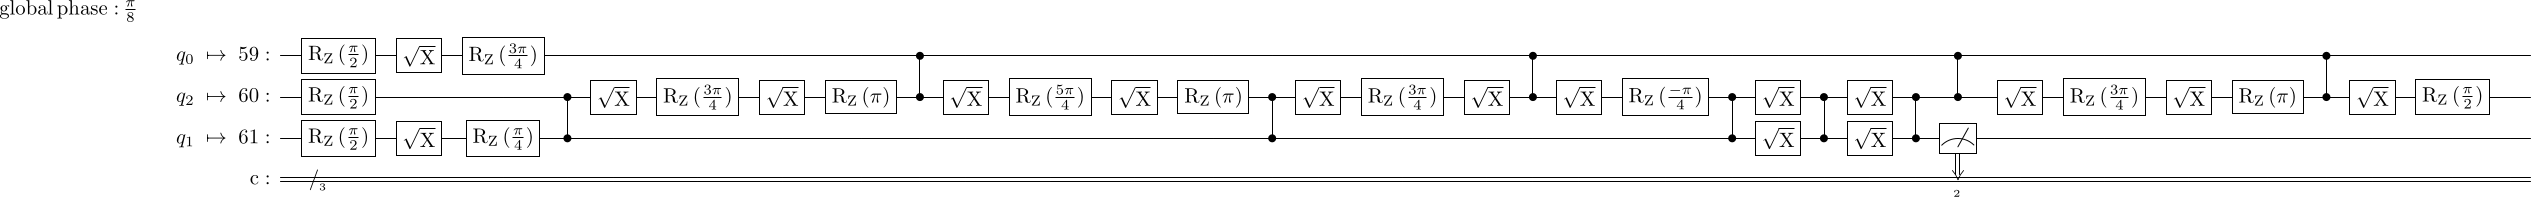

Circuit after optimization level 3 transpilation:


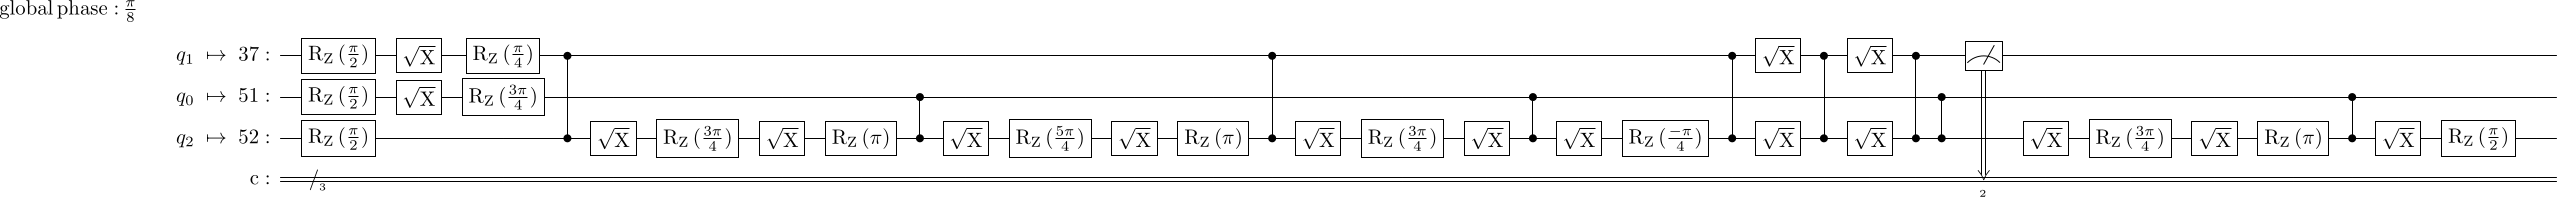

In [ ]:
print("Toffoli Circuit")
circuitFigure = toffoliCircuit.draw(output="mpl")
display(circuitFigure)

# Had to use latex after transpilation because mpl output was throwing an error I could not resolve.
transpiledCircuit = level0.run(toffoliCircuit)
circuitFigure = transpiledCircuit.draw(output="latex")
print("Circuit after lowest optimization level transpilation:")
display(circuitFigure)

transpiledCircuit = level1.run(toffoliCircuit)
circuitFigure = transpiledCircuit.draw(output="latex")
print("Circuit after optimization level 1 transpilation:")
display(circuitFigure)

transpiledCircuit = level2.run(toffoliCircuit)
circuitFigure = transpiledCircuit.draw(output="latex")
print("Circuit after optimization level 2 transpilation:")
display(circuitFigure)

transpiledCircuit = level3.run(toffoliCircuit)
circuitFigure = transpiledCircuit.draw(output="latex")
print("Circuit after optimization level 3 transpilation:")
display(circuitFigure)

print("Circuit transpilations hard to analyze visually due to circuit complexity and depth")
print("Notes: Global Phase decreased, approaching 0 as optimization level increased.")
print("Depth decreased overall as optimization level increased.")
print("Once again level 0 naively maps qubit numbers directly to physical qubit numbers, regardless of connectivity")
print("Qubit numbers consistently changed and continue to be optimized through levels 1-3")
print("")
print("Compared to other prepared circuits, troffoli circuits seems to be most complex and difficult to transpile efficiently.")
print("Is this due to the 3-qubit gate? The hadamards seem to just add a couple of gates to the beginning.")
print("This shows that multi qubit gates can be extremely depth intensive when transpiled to hardware with limited connectivity and basis gates.")


### 3. Bell State Circuit (w/Unsupported Basis Gates)
bellCircuit

Bell State Circuit


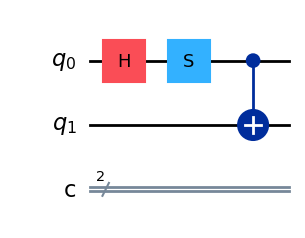

Circuit after lowest optimization level transpilation:


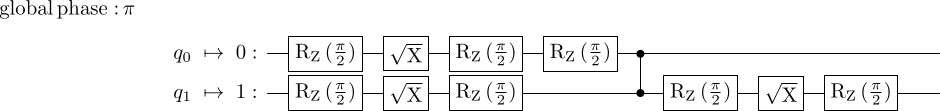

Circuit after optimization level 1 transpilation:
Note circuit has kept same qubit numbers to level 0 transpilation.
This may signify qubit 0 and 1 may provide a perfect layout after the default pass manager executed TrivialLayout.
Shows that level 1 may not optimize for error rate, and rather just strives for 'perfect' layout. (No SWAPs necessary)
Note reduction in top qubit gate depth by changing 2nd top RZ gate parameter.


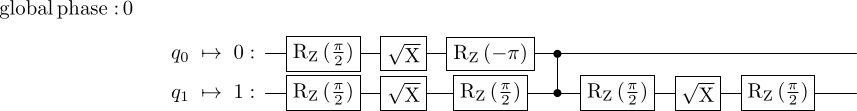

Circuit after optimization level 2 transpilation:
Note reduction in depth by 1 through change in parameter of bottom 2nd RZ gate.


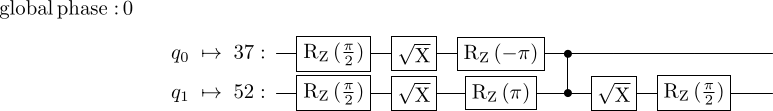

Circuit after optimization level 3 transpilation:
Note no change in gate depth or parameters, but change in qubit numbers and gate layout. Likely from optimizing for error rates.


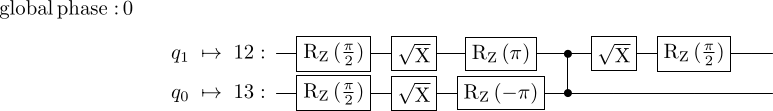

In [69]:
print("Bell State Circuit")
circuitFigure = bellCircuit.draw(output="mpl")
display(circuitFigure)

# Had to use latex after transpilation because mpl output was throwing an error I could not resolve.
transpiledCircuit = level0.run(bellCircuit)
circuitFigure = transpiledCircuit.draw(output="latex")
print("Circuit after lowest optimization level transpilation:")
display(circuitFigure)

transpiledCircuit = level1.run(bellCircuit)
circuitFigure = transpiledCircuit.draw(output="latex")
print("Circuit after optimization level 1 transpilation:")
print("Note circuit has kept same qubit numbers to level 0 transpilation.")
print("This may signify qubit 0 and 1 may provide a perfect layout after the default pass manager executed TrivialLayout.")
print("Shows that level 1 may not optimize for error rate, and rather just strives for 'perfect' layout. (No SWAPs necessary)")
print("Note reduction in top qubit gate depth by changing 2nd top RZ gate parameter.")
display(circuitFigure)

transpiledCircuit = level2.run(bellCircuit)
circuitFigure = transpiledCircuit.draw(output="latex")
print("Circuit after optimization level 2 transpilation:")
print("Note reduction in depth by 1 through change in parameter of bottom 2nd RZ gate.")
display(circuitFigure)

transpiledCircuit = level3.run(bellCircuit)
circuitFigure = transpiledCircuit.draw(output="latex")
print("Circuit after optimization level 3 transpilation:")
print("Note no change in gate depth or parameters, but change in qubit numbers and gate layout. Likely from optimizing for error rates.")
display(circuitFigure)

# Conclusion

While 